# นางสาว สมิตานัน ชัยนิลพันธุ์ รหัสนิสิต 6241225426

# ค่าครองชีพในไทยสูงเกินไปหรือไม่เมื่อเทียบกับค่าแรงขั้นต่ำ

# ข้อมูลแหล่งที่มาที่ใช้ในการวิเคราะห์
 - อัตราค่าจ้างขั้นต่ำในประเทศไทย
    https://data.go.th/dataset/wage-rate2563
 - 10 ปีผ่านไปค่าแรงขั้นค่ำขึ้นแค่ 13-36 บาท
    https://workpointtoday.com/wage-5/
 - ค่าครองชีพในไทย 
    https://www.prachachat.net/columns/news-834881
 - ค่าใช้จ่ายของครัวเรือนตั้งแต่ปี พ.ศ.2554-2563
    http://statbbi.nso.go.th/staticreport/page/sector/th/08.aspx
 - Minimum Wage per Month in all countries
    https://www-portal-euromonitor-com.chula.idm.oclc.org/portal/statisticsevolution/index



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re 
import io
import seaborn as sns

# ค่าแรงขั้นต่ำ(min wages)
อัตราค่าแรงขั้นต่ำของประเทศไทยได้ถูกปรับขึ้นล่าสุดเมื่อวันที่ 1 ม.ค. 2563

In [2]:
mw=pd.read_excel('export_minwage2563.xlsx')

In [3]:
len(mw)

77

In [4]:
mw[:10]

,PROVINCE_NAME,LOCATION_CODE,PROV_CODE,MIN_WAGES,YEAR,ANNOUNCE_DD,EFFECT_DD,CREATE_DATE
0,กระบี่,810000,81,325,2563,6 ธ.ค. 62,1 ม.ค. 63,22 ม.ค. 63
1,กรุงเทพมหานคร,100000,10,331,2563,6 ธ.ค. 62,1 ม.ค. 63,22 ม.ค. 63
2,กาญจนบุรี,710000,71,320,2563,6 ธ.ค. 62,1 ม.ค. 63,22 ม.ค. 63
3,กาฬสินธุ์,460000,46,323,2563,6 ธ.ค. 62,1 ม.ค. 63,22 ม.ค. 63
4,กำแพงเพชร,620000,62,315,2563,6 ธ.ค. 62,1 ม.ค. 63,22 ม.ค. 63
5,ขอนแก่น,400000,40,325,2563,6 ธ.ค. 62,1 ม.ค. 63,22 ม.ค. 63
6,จันทบุรี,220000,22,323,2563,6 ธ.ค. 62,1 ม.ค. 63,22 ม.ค. 63
7,ฉะเชิงเทรา,240000,24,330,2563,6 ธ.ค. 62,1 ม.ค. 63,22 ม.ค. 63
8,ชลบุรี,200000,20,336,2563,6 ธ.ค. 62,1 ม.ค. 63,22 ม.ค. 63
9,ชัยนาท,180000,18,320,2563,6 ธ.ค. 62,1 ม.ค. 63,22 ม.ค. 63


In [5]:
print('ข้อมูลที่ต้องการมาคำนวนคือข้อมูลในคอลลัมน์ MIN_WAGES เป็น int64 สามารถนำมาคำนวณได้แล้ว')
mw.info()

ข้อมูลที่ต้องการมาคำนวนคือข้อมูลในคอลลัมน์ MIN_WAGES เป็น int64 สามารถนำมาคำนวณได้แล้ว
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PROVINCE_NAME  77 non-null     object
 1   LOCATION_CODE  77 non-null     int64 
 2   PROV_CODE      77 non-null     int64 
 3   MIN_WAGES      77 non-null     int64 
 4   YEAR           77 non-null     int64 
 5   ANNOUNCE_DD    77 non-null     object
 6   EFFECT_DD      77 non-null     object
 7   CREATE_DATE    77 non-null     object
dtypes: int64(4), object(4)
memory usage: 4.9+ KB


# หาค่าเฉลี่ยของอัตราค่าจ้างขั้นต่ำของทั้งประเทศ

In [6]:
avg=mw['MIN_WAGES'].mean()
print('avg = ', '{:.2f}'.format(avg),  'บาท')
print(' ทำเป็นทศนิยม 2 ตำแหน่งเพื่อความสะดวกในการอ่านค่า')

avg =  321.09 บาท
 ทำเป็นทศนิยม 2 ตำแหน่งเพื่อความสะดวกในการอ่านค่า


Text(0.5, 1.0, 'mean= 321.09')

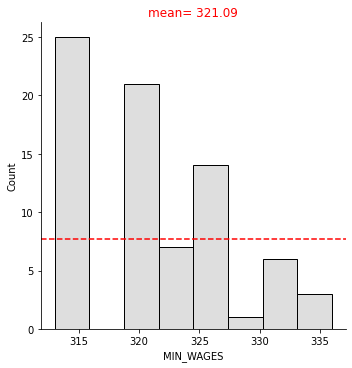

In [7]:
mn=mw['MIN_WAGES'].value_counts().mean()
sns.displot(x=mw['MIN_WAGES'], color = 'lightgrey')
plt.axhline(y=mn, linestyle='--', color='red')
plt.title(f"mean= {mw.MIN_WAGES.mean():.2f}", color='red')

จากกราฟจะเห็นได้ว่าคนจำนวนน้อยที่ได้ค่าแรงขั้นต่ำมากกว่ากว่าค่าแรงขั้นต่ำเฉลี่ยซึ่งค่าแรงขั้นต่ำเฉลี่ยของคนไทยอยู่ที่ 321.09 บาทหรือตกเดือนนึงอยู่ที่ประมาณ 9,630 บาท 

<AxesSubplot:xlabel='MIN_WAGES'>

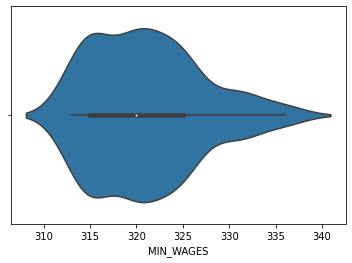

In [8]:
sns.violinplot(x=mw['MIN_WAGES'])

จากกราฟการกระจายจะเห็นว่าค่าแรงขั้นต่ำของคนในประเทศแต่ละจังหวัดจะอยู่ราวๆที่ 315-320 บาท

# ค่าครองชีพ 
คือ ค่าใช้จ่ายในการดำรงชีวิตประจำวัน เช่น สินค้าอุปโภคบริโภคที่จำเป็นต่อชีวิตประจำวัน ปัจจัย4 อาหาร ผัก เนื้อสัตว์ฯลฯ

In [9]:
print('ตารางแสดงค่าครองชีพเฉลี่ยของแต่ละจังหวัดตั้งแต่ปี พ.ศ.2554-2563')
ep=pd.read_excel(('ค่าครองชีพ.xlsx'), index_col='country')
ep

ตารางแสดงค่าครองชีพเฉลี่ยของแต่ละจังหวัดตั้งแต่ปี พ.ศ.2554-2563


,y2554,y2555,y2556,y2557,y2558,y2559,y2560,y2561,y2562,y2563
country,,,,,,,,,,
กรุงเทพมหานคร,29969.2,33956.98,35023.7,34425.64,33085.7,35101.40,35350.70,34127.44,31753.04,32052.03
สมุทรปราการ,20158.2,25860.88,26192.9,22747.21,22331.8,24353.97,24354.72,23231.71,21423.43,23850.82
นนทบุรี,29099.3,28731.23,26946.6,30812.06,31381.0,28828.37,33313.04,33808.98,32189.09,33042.31
ปทุมธานี,18993.2,30668.81,29514.0,30197.07,29770.0,31271.04,33604.46,43300.51,37086.11,33823.84
พระนครศรีอยุธยา,17534.3,25215.89,20493.7,20409.63,22218.1,23095.32,23780.19,22790.08,24439.76,23391.26
...,...,...,...,...,...,...,...,...,...,...
ตรัง,22686.6,19617.83,20922.3,17107.10,19794.9,18599.29,18768.44,18648.61,20143.01,17904.52
พัทลุง,18111.6,18404.19,16635.7,18514.03,17143.3,18420.66,16807.88,15947.09,15848.77,16817.89
ปัตตานี,14011.7,14119.15,16668.1,14809.34,15341.1,17962.18,16948.61,15705.85,15948.56,14862.49


In [10]:
m54 = ep['y2554'].mean().round(2)
m55 = ep['y2555'].mean().round(2)
m55

17431.84

In [11]:
m56 = ep['y2556'].mean().round(2)
m57 = ep['y2557'].mean().round(2)
m58 = ep['y2558'].mean().round(2)
m59 = ep['y2559'].mean().round(2)
m60 = ep['y2560'].mean().round(2)
m61 = ep['y2561'].mean().round(2)
m62 = ep['y2562'].mean().round(2)
m63 = ep['y2563'].mean().round(2)

สร้าง DataFrame ของค่าครองชีพเฉลี่ยรวมในแต่ละปีเพื่อทำให้นำไปวิเคราะห์ข้อมูลง่ายขึ้น

In [12]:
mn = pd.Series([m54, m55, m56, m57, m58, m59, m60, m61, m62, m63], 
            index=[['y54','y55','y56','y57','y58','y59','y60','y61','y62','y63']])
mn

y54    16154.12
y55    17431.84
y56    17730.96
y57    18664.75
y58    18981.72
y59    18776.70
y60    18958.86
y61    18764.14
y62    18521.37
y63    19173.31
dtype: float64

In [13]:
mnt = pd.concat([mn], axis=1)
mnt.columns= ['mean_per_month']
mnt

,mean_per_month
y54,16154.12
y55,17431.84
y56,17730.96
y57,18664.75
y58,18981.72
y59,18776.70
y60,18958.86
y61,18764.14
y62,18521.37
y63,19173.31


In [14]:
mnd = pd.concat([mn/30],axis=1)
mnd.columns=['mean_per_day']
mnd.round(2)

,mean_per_day
y54,538.47
y55,581.06
y56,591.03
y57,622.16
y58,632.72
y59,625.89
y60,631.96
y61,625.47
y62,617.38
y63,639.11


In [15]:
mep = pd.concat([mnt,mnd.round(2) ],axis=1)
mep

,mean_per_month,mean_per_day
y54,16154.12,538.47
y55,17431.84,581.06
y56,17730.96,591.03
y57,18664.75,622.16
y58,18981.72,632.72
y59,18776.70,625.89
y60,18958.86,631.96
y61,18764.14,625.47
y62,18521.37,617.38
y63,19173.31,639.11


คำนวณออกมาเป็นค่าครองชีพเฉลี่ยต่อเดือนและต่อวัน

กราฟแสดงค่าเฉลี่ยของค่าครองชีพในแต่ละปี แสดงให้เห็นว่าค่าครองชีพมีแนวโน้มสูงขึ้นอีกในปีถัดๆไป


<AxesSubplot:>

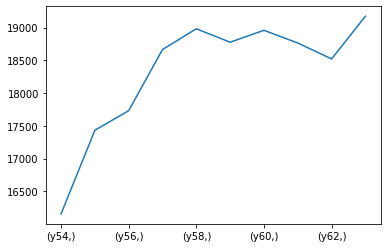

In [16]:
print('กราฟแสดงค่าเฉลี่ยของค่าครองชีพในแต่ละปี แสดงให้เห็นว่าค่าครองชีพมีแนวโน้มสูงขึ้นอีกในปีถัดๆไป')
mn.plot()

# เทียบค่าครองชีพของปี 2562 และ 2563
- เนื่องจากเป็นข้อมูลสองปีล่าสุดที่หาได้ สร้างกราฟเพื่อดูแนวโน้มของค่าครองชีพว่าไปในทิศทางใด

จากกราฟแสดงการเปรียบเทียบค่าครองชีพของปี 2562 และ 2563 จะเห็นได้ว่าค่าเฉลี่ยของค่าครองชีพเพิ่มสูงขึ้น
(2,)


<AxesSubplot:xlabel='y2563', ylabel='Count'>

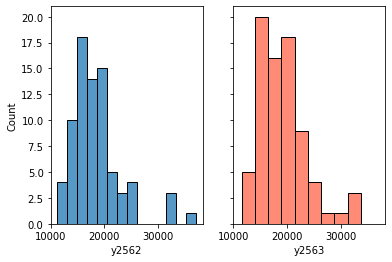

In [17]:
print('จากกราฟแสดงการเปรียบเทียบค่าครองชีพของปี 2562 และ 2563 จะเห็นได้ว่าค่าเฉลี่ยของค่าครองชีพเพิ่มสูงขึ้น')
fig, ax=plt.subplots(1,2, sharey =True, sharex =True)
print(ax.shape)
sns.histplot(ep['y2562'],ax=ax[0])
sns.histplot(ep['y2563'], ax=ax[1],color="tomato")
# plt.legend()

ค่าครองชีพเฉลี่ยของคนไทยในปี 2563 อยู่ที่ 639.11 บาท ส่วนค่าจ้างขั้นต่ำเฉลี่ยของปี 2563 อยู่ที่ 321.09 บาท จากข้อมูลข้างต้นทำให้เห็นว่าค่าแรงขั้นต่ำของคนไทยไม่เพียงพอต่อค่าครองชีพและมีค่าครองชีพสูงกว่าอัตราค่าแรงเกือบเท่าตัว แล้วส่วนต่างที่ต้องนำมาใช้ก็อาจเกิดจากการกู้ยืมต่างๆซึ่งเป็นการเพิ่มภาระหนี้สิน ค่าแรงขั้นต่ำของไทยเมื่อเทียบกับทั่วโลกอาจดูไม่น้อยกว่าประเทศอื่นแต่เนื่องจากค่าครองชีพสวนทางกับค่าแรงจึงทำให้สรุปได้ว่าไทยมีค่าครองชีพสูงเกินไปเมื่อเทียบกับค่าแรงขั้นต่ำ

# อ้างอิงตารางของค่าแรงขั้นต่ำทั่วโลก

In [18]:
mww = pd.read_excel('Passport_Stats_21-02-2022_1013_GMT.xls',index_col='Geography')
mww

,Category,Data Type,Unit,Currency Conversion,Current Constant,2016,2017,2018,2019,2020,2021
Geography,,,,,,,,,,,
Afghanistan,Minimum Wage per Month,Socio-economic indicators,USD,Fixed 2021 ex rates,Current Prices,62.4,68.7,68.7,68.7,68.7,68.7
Armenia,Minimum Wage per Month,Socio-economic indicators,USD,Fixed 2021 ex rates,Current Prices,106.5,106.5,106.5,131.6,131.6,139.4
Azerbaijan,Minimum Wage per Month,Socio-economic indicators,USD,Fixed 2021 ex rates,Current Prices,61.8,68.2,76.5,147.1,147.1,164.7
Bangladesh,Minimum Wage per Month,Socio-economic indicators,USD,Fixed 2021 ex rates,Current Prices,62.3,62.3,94.0,94.0,94.0,94.0
Bhutan,Minimum Wage per Month,Socio-economic indicators,USD,Fixed 2021 ex rates,Current Prices,50.7,50.7,50.7,50.7,50.7,50.7
...,...,...,...,...,...,...,...,...,...,...,...
Netherlands,Minimum Wage per Month,Socio-economic indicators,USD,Fixed 2021 ex rates,Current Prices,1818.4,1851.7,1885.8,1934.8,1987.3,2012.1
Portugal,Minimum Wage per Month,Socio-economic indicators,USD,Fixed 2021 ex rates,Current Prices,731.4,768.7,800.4,828.0,876.3,917.7
Spain,Minimum Wage per Month,Socio-economic indicators,USD,Fixed 2021 ex rates,Current Prices,904.2,976.7,1015.6,1242.1,1311.0,1311.0


In [19]:
for i in range(2016, 2021):
    mww[str(i)]=pd.to_numeric(mww[str(i)],errors='coerce')
mww.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, Afghanistan to United Kingdom
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             165 non-null    object 
 1   Data Type            165 non-null    object 
 2   Unit                 165 non-null    object 
 3   Currency Conversion  165 non-null    object 
 4   Current Constant     165 non-null    object 
 5   2016                 165 non-null    float64
 6   2017                 165 non-null    float64
 7   2018                 165 non-null    float64
 8   2019                 165 non-null    float64
 9   2020                 165 non-null    float64
 10  2021                 165 non-null    float64
dtypes: float64(6), object(5)
memory usage: 15.5+ KB


เปลี่ยนข้อมูลเป็น float เพื่อนำไปคำนวณหรือทำกราฟต่อ

In [20]:
mwt=mww.drop(columns=['Category','Current Constant','Data Type','Currency Conversion','Unit'])
mwt=mwt.loc['Thailand']
mwt

2016    243.8
2017    247.9
2018    264.1
2019    269.0
2020    269.0
2021    273.1
Name: Thailand, dtype: float64

In [21]:
mwtct=mwt*31
mwtct

2016    7557.8
2017    7684.9
2018    8187.1
2019    8339.0
2020    8339.0
2021    8466.1
Name: Thailand, dtype: float64

แปลงหน่วยเงินเป็นบาท

<AxesSubplot:>

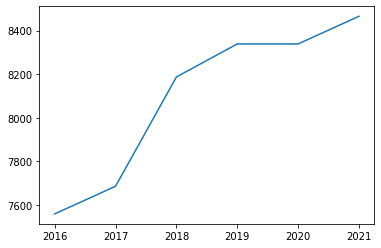

In [22]:
mwtct.plot()

ในข้อมูลล่าสุดจะเห็นว่ากราฟค่าแรงขั้นต่ำของประเทศไทยในช่วงปี 2016-2019 เพิ่มขึ้นอย่างต่อเนื่องแต่คงที่ในปีถัดมาและเพิ่มขึ้นอีกครั้งในปี 2021 แต่ในปริมาณเพียงเล็กน้อย